In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import time
import tensorflow
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import logging
import math
import os
from sklearn.preprocessing import MinMaxScaler, scale
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
from keras import optimizers
from sklearn.metrics import mean_squared_error
from keras.models import load_model
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)

# 데이터 불러오기 / 데이터 정리

In [3]:
IT_nonfinance = pd.read_excel('./data/dongboo/비재무/IT_비재무_TOTAL_최종.xlsx')
Medicine_nonfinance = pd.read_excel('./data/dongboo/비재무/제약_비재무_TOTAL_최종.xlsx')

In [4]:
Medicine_nonfinance.drop(["근속_연","근속_월"],axis = 1, inplace= True)

In [5]:
# krx에서 가져온 자료
IT_stock = pd.read_excel('./data/dongboo/IT_주가_total_krx.xlsx')
Medicine_stock = pd.read_excel('./data/dongboo/제약_주가_total_krx.xlsx')

# IT_stock = pd.read_excel('./data/dongboo/IT_TOTAL_주가.xlsx')
# Medicine_stock = pd.read_excel('./data/dongboo/제약_TOTAL_주가.xlsx')

In [6]:
IT_stock

,회사명,거래소코드,회계년도,최고가,최저가,종가,거래량,거래대금
0,LG이노텍(주),11070,2018/12,103000,84000,93500,3739997,345607299000
1,LG이노텍(주),11070,2018/11,127000,94000,110500,7990160,849334038995
2,LG이노텍(주),11070,2018/10,133000,118000,125500,4229243,533333395000
3,LG이노텍(주),11070,2018/09,155500,130000,142750,5569000,764547735607
4,LG이노텍(주),11070,2018/08,164000,137000,150500,4849283,711882140750
5,LG이노텍(주),11070,2018/07,163000,139500,151250,4096286,639917556000
6,LG이노텍(주),11070,2018/06,155500,139000,147250,4568478,671827839768
7,LG이노텍(주),11070,2018/05,144500,123500,134000,5437043,725054123493
8,LG이노텍(주),11070,2018/04,136500,116500,126500,6099695,763215432058
9,LG이노텍(주),11070,2018/03,137500,120000,128750,5184190,668888538140


In [7]:
IT = pd.merge(IT_nonfinance,IT_stock,how = 'left', on = ['회사명','거래소코드','회계년도'])
Medicine = pd.merge(Medicine_nonfinance,Medicine_stock,how = 'left', on = ['회사명','거래소코드','회계년도'])

In [8]:
IT.columns

Index(['회사명', '거래소코드', '회계년도', '주식의 종류', '발행할 주식의 총수(주)', '현재까지 발행한 주식의 총수(주)', '현재까지 감소한 주식의 총수(주)', '유통주식수 (발행주식의 총수 - 자기주식수)(주)', '이익소각(주)', '발행주식의 총수 (현재 발행한 주식수 - 현재 감소한 주식수)(주)', '자기주식수(주)', '정규+무기계약_기말인원(남)(명)', '정규+무기계약_기말인원(여)(명)', '정규+무기계약_기말인원(명)', '기간제_기말인원(남)(명)', '기간제_기말인원(여)(명)', '기간제_기말인원(명)', '합계_기말인원_남(명)', '합계_기말인원_여(명)', '합계_기말인원(명)', '합계_년간평균급여(천원)', '합계_1인평균년간급여(천원)', '합계_평균근속연수', '최고가', '최저가', '종가', '거래량', '거래대금'], dtype='object')

In [9]:
#del IT['주식매입선택권.1']

# 회사별로 분리

In [10]:
lg = IT[IT['회사명'] == 'LG이노텍(주)']
sdi = IT[IT['회사명'] == '삼성SDI(주)']
ssem = IT[IT['회사명'] == '삼성전기(주)']
hynix = IT[IT['회사명'] == '에스케이하이닉스(주)']

In [11]:
lg

,회사명,거래소코드,회계년도,주식의 종류,발행할 주식의 총수(주),현재까지 발행한 주식의 총수(주),현재까지 감소한 주식의 총수(주),유통주식수 (발행주식의 총수 - 자기주식수)(주),이익소각(주),발행주식의 총수 (현재 발행한 주식수 - 현재 감소한 주식수)(주),자기주식수(주),정규+무기계약_기말인원(남)(명),정규+무기계약_기말인원(여)(명),정규+무기계약_기말인원(명),기간제_기말인원(남)(명),기간제_기말인원(여)(명),기간제_기말인원(명),합계_기말인원_남(명),합계_기말인원_여(명),합계_기말인원(명),합계_년간평균급여(천원),합계_1인평균년간급여(천원),합계_평균근속연수,최고가,최저가,종가,거래량,거래대금
0,LG이노텍(주),11070,2010/03,10,200000000,17131823,0,17129223,0,17131823,2600,0,0,0,0,0,0,6523,6187,12710,86825591,6831,3.00,128500,97800,113150,5785616,644359793314
1,LG이노텍(주),11070,2011/03,10,200000000,20146503,0,20143903,0,20146503,2600,5770,1781,7551,86,241,327,5856,2022,7878,98617000,13000,3.20,126500,112000,119250,5105469,597488403500
2,LG이노텍(주),11070,2012/03,10,200000000,20167963,0,20165363,0,20167963,2600,5890,1709,7599,36,170,206,5926,1879,7805,101397000,13000,5.44,107000,94000,100500,4689082,478587655600
3,LG이노텍(주),11070,2013/03,10,200000000,20170754,0,20168154,0,20170754,2600,6247,1762,8009,1066,351,1417,7313,2113,9426,118026000,13000,4.60,79100,71600,75350,2628498,199385049000
4,LG이노텍(주),11070,2014/03,10,200000000,20288271,0,20285671,0,20288271,2600,6988,1683,8671,78,152,230,7066,1835,8901,131983000,15000,5.70,103000,89500,96250,3130564,306385114000
5,LG이노텍(주),11070,2015/03,10,200000000,23667107,0,23664507,0,23667107,2600,7101,1634,8735,124,127,251,7225,1761,8986,182745000,27000,6.28,116000,102500,109250,4273591,469566045000
6,LG이노텍(주),11070,2016/03,10,200000000,23667107,0,23664507,0,23667107,2600,6838,1522,8360,70,50,120,6908,1572,8480,143947000,17000,7.10,86600,77900,82250,3953705,326948428700
7,LG이노텍(주),11070,2017/03,10,200000000,23667107,0,23664507,0,23667107,2600,6594,1348,7942,158,172,330,6752,1520,8272,127308000,15000,7.60,142000,122000,132000,3996104,527146529413
8,LG이노텍(주),11070,2018/03,10,200000000,23667107,0,23664507,0,23667107,2600,6686,1364,8050,610,246,856,7296,1610,8906,202807000,18000,7.90,137500,120000,128750,5184190,668888538140
33,LG이노텍(주),11070,2010/06,10,200000000,20064406,0,20061806,0,20064406,2600,0,0,0,0,0,0,5001,1496,6497,152043000,23400,3.70,173000,156500,164750,6159012,1009752795890


In [12]:
lg['종가'][2:].reset_index(drop=True)

0     100500
1      75350
2      96250
3     109250
4      82250
5     132000
6     128750
7     164750
8      96550
9      82350
10     93850
11    135500
12    102100
13     82150
14    153250
15    147250
16    139750
17     63450
18     85500
19    126250
20     91050
21     82000
22    163500
23    142750
24    131500
25     70300
26     83750
27     80650
28    104800
29     99000
30     84000
31    149000
Name: 종가, dtype: int64

In [13]:
greencross = Medicine[Medicine['회사명'] == '(주)녹십자']
daewoong = Medicine[Medicine['회사명'] == '(주)대웅제약']
yoohan = Medicine[Medicine['회사명'] == '(주)유한양행']
hanmi = Medicine[Medicine['회사명'] == '한미약품(주)']

In [14]:
def classify(stock):
    
    # 회계년도 순으로 정렬 및 인덱스 초기화
    stock.sort_values('회계년도', ascending= True, inplace = True)
    
    stock.reset_index(drop = True, inplace = True)
    
    
    # 새로운 변수 추가
    
    stock['1년뒤종가'] = stock['종가'][3:].reset_index(drop=True)
    
    stock['연간수익률'] = (stock['1년뒤종가'] - stock['종가']) / stock['종가']
    
    stock['수익률상승하락'] = stock['연간수익률']
    
    for i in range(len(stock)):
        if stock['연간수익률'][i] < 0.005:
            stock['수익률상승하락'][i] = 0
        else:
            stock['수익률상승하락'][i] = 1
        
       
    return stock

In [15]:
classify(lg)
classify(sdi)
classify(ssem)
classify(hynix)

classify(greencross)
classify(daewoong)
classify(yoohan)
classify(hanmi)

,회사명,거래소코드,회계년도,주식의 종류,발행할 주식의 총수(주),현재까지 발행한 주식의 총수(주),현재까지 감소한 주식의 총수(주),유통주식수 (발행주식의 총수 - 자기주식수)(주),이익소각(주),발행주식의 총수 (현재 발행한 주식수 - 현재 감소한 주식수)(주),자기주식수(주),정규+무기계약_기말인원(남)(명),정규+무기계약_기말인원(여)(명),정규+무기계약_기말인원(명),기간제_기말인원(남)(명),기간제_기말인원(여)(명),기간제_기말인원(명),합계_기말인원_남(명),합계_기말인원_여(명),합계_기말인원(명),합계_년간평균급여(천원),합계_1인평균년간급여(천원),합계_평균근속연수,최고가,최저가,종가,거래량,거래대금,1년뒤종가,연간수익률,수익률상승하락
0,한미약품(주),128940,2010/09,10,15000000,7154540,0,7150421,0,7154540,4119,0,0,0,0,0,0,0,0,1917,64121000,33000,5.250000,119000,104000,111500,1298286,147793375500,73850.0,-0.337668,0.0
1,한미약품(주),128940,2010/12,10,16000000,7154540,0,7150421,0,7154540,4119,1438,463,1901,0,0,0,1438,463,1901,92683000,49000,5.480000,96300,85300,90800,1448998,128379414000,75550.0,-0.167952,0.0
2,한미약품(주),128940,2011/03,10,16000000,7512061,0,7504311,0,7512061,7750,1435,467,1902,0,0,0,1435,467,1902,23989086,12613,4.800000,87500,74600,81050,718507,57610507200,65400.0,-0.193091,0.0
3,한미약품(주),128940,2011/06,10,16000000,7512061,0,7504311,0,7512061,7750,1483,459,1942,0,0,0,1483,459,1942,44166000,23000,4.960000,77100,70600,73850,879634,65081187100,57100.0,-0.226811,0.0
4,한미약품(주),128940,2011/09,10,16000000,7512061,0,7504311,0,7512061,7750,1499,434,1933,0,0,0,1499,434,1933,62231000,32000,5.070000,83100,68000,75550,304899,22588237200,59600.0,-0.211118,0.0
5,한미약품(주),128940,2011/12,10,16000000,7512061,0,7504311,0,7512061,7750,1490,429,1919,0,0,0,1490,429,1919,83117000,43000,5.250000,68300,62500,65400,462293,30233148400,117500.0,0.796636,1.0
6,한미약품(주),128940,2012/03,10,25000000,7887276,0,7876819,0,7887276,10457,1573,429,2002,0,0,0,1573,429,2002,24805000,12000,5.166667,60300,53900,57100,491161,27979739700,159250.0,1.788967,1.0
7,한미약품(주),128940,2012/06,10,25000000,7887276,0,7876819,0,7887276,10457,1346,419,1765,0,0,0,1346,419,1765,42675000,24000,5.560000,67100,52100,59600,968824,57979706500,160500.0,1.692953,1.0
8,한미약품(주),128940,2012/12,10,25000000,7887276,0,7876819,0,7887276,10457,1322,411,1733,0,0,0,1322,411,1733,80709000,47000,5.750000,125000,110000,117500,986390,118356257000,139250.0,0.185106,1.0
9,한미약품(주),128940,2013/03,10,25000000,8281116,0,8268121,0,8281116,12995,1324,431,1755,0,0,0,1324,431,1755,22709000,13000,5.750000,166500,152000,159250,846238,134802296500,119250.0,-0.251177,0.0


In [16]:
lg = lg.iloc[:-1,:]
sdi = sdi.iloc[:-1,:]
ssem = ssem.iloc[:-1,:]
hynix = hynix.iloc[:-1,:]

greencross = greencross.iloc[:-1,:]
daewoong = daewoong.iloc[:-1,:]
yoohan = yoohan.iloc[:-1,:]
hanmi = hanmi.iloc[:-1,:]

# 산업별 변수 <1년뒤 종가>와의 상관관계 분석

In [17]:
# 밑에 함수로 해보기!!!!

In [18]:
lg_corr = lg.corr(method = 'pearson')
df_lg = pd.DataFrame(lg_corr['1년뒤종가']).reset_index().sort_values('1년뒤종가', ascending = False)
df_lg.columns = ['지표','1년뒤종가']

sdi_corr = sdi.corr(method = 'pearson')
df_sdi = pd.DataFrame(sdi_corr['1년뒤종가']).reset_index().sort_values('1년뒤종가', ascending = False)
df_sdi.columns = ['지표','1년뒤종가']

ssem_corr = ssem.corr(method = 'pearson')
df_ssem = pd.DataFrame(ssem_corr['1년뒤종가']).reset_index().sort_values('1년뒤종가', ascending = False)
df_ssem.columns = ['지표','1년뒤종가']

hynix_corr = hynix.corr(method = 'pearson')
df_hynix = pd.DataFrame(hynix_corr['1년뒤종가']).reset_index().sort_values('1년뒤종가', ascending = False)
df_hynix.columns = ['지표','1년뒤종가']

# 산업별 상관관계 데이터프레임

In [19]:
pd.concat([df_lg.reset_index(drop = True), df_sdi.reset_index(drop = True), df_ssem.reset_index(drop = True), df_hynix.reset_index(drop = True)],axis = 1)

,지표,1년뒤종가,지표,1년뒤종가,지표,1년뒤종가,지표,1년뒤종가
0,1년뒤종가,1.000000,1년뒤종가,1.000000,1년뒤종가,1.000000,1년뒤종가,1.000000
1,연간수익률,0.625652,자기주식수(주),0.755180,연간수익률,0.603141,합계_평균근속연수,0.820362
2,합계_평균근속연수,0.485993,수익률상승하락,0.641486,수익률상승하락,0.494859,최고가,0.785440
3,합계_기말인원_남(명),0.424990,연간수익률,0.602674,거래량,0.415787,종가,0.785078
4,합계_기말인원(명),0.405653,최고가,0.499031,거래대금,0.389699,최저가,0.779049
5,기간제_기말인원(여)(명),0.380614,종가,0.484729,최고가,0.370461,합계_기말인원(명),0.768316
6,기간제_기말인원(명),0.367478,최저가,0.460921,종가,0.357774,기간제_기말인원(명),0.749834
7,유통주식수 (발행주식의 총수 - 자기주식수)(주),0.288694,기간제_기말인원(명),0.270487,합계_평균근속연수,0.356442,자기주식수(주),0.713813
8,현재까지 발행한 주식의 총수(주),0.288694,기간제_기말인원(남)(명),0.202134,최저가,0.339417,정규+무기계약_기말인원(남)(명),0.670486
9,발행주식의 총수 (현재 발행한 주식수 - 현재 감소한 주식수)(주),0.288694,합계_1인평균년간급여(천원),0.181850,합계_1인평균년간급여(천원),0.201125,기간제_기말인원(남)(명),0.636738


In [20]:
list_corr = []
order = 30 # 기업별로 상위 30개 상관관계 변수 추출

for i in range(len(df_lg.index[:order])):
    list_corr.append(df_lg.index[:order][i])
    list_corr.append(df_sdi.index[:order][i])
    list_corr.append(df_ssem.index[:order][i])
    list_corr.append(df_hynix.index[:order][i])

variable = pd.Series(list_corr).value_counts()
variable = pd.DataFrame(variable).reset_index()
variable.columns = ['var_index', 'number']

In [21]:
var = []
for i in range(len(variable)):
    var.append(df_lg[df_lg.index == variable['var_index'][i]]['지표'].values[0])
var = pd.DataFrame(var)
var.columns = ['var']

In [22]:
corr = pd.concat([variable,var], axis = 1)
corr = corr[['var_index','var','number']]
corr.head(30)

,var_index,var,number
0,28,수익률상승하락,4
1,13,기간제_기말인원(여)(명),4
2,1,주식의 종류,4
3,2,발행할 주식의 총수(주),4
4,3,현재까지 발행한 주식의 총수(주),4
5,4,현재까지 감소한 주식의 총수(주),4
6,5,유통주식수 (발행주식의 총수 - 자기주식수)(주),4
7,6,이익소각(주),4
8,7,발행주식의 총수 (현재 발행한 주식수 - 현재 감소한 주식수)(주),4
9,8,자기주식수(주),4


# 위 자료를 보고 변수 선정

In [23]:
deep_lg = lg[corr['var'][3:22]]
deep_sdi = sdi[corr['var'][3:22]]
deep_ssem = ssem[corr['var'][3:22]]
deep_hynix = hynix[corr['var'][3:22]]

deep_lg['수익률상승하락'] = lg['수익률상승하락']
deep_sdi['수익률상승하락'] = sdi['수익률상승하락']
deep_ssem['수익률상승하락'] = ssem['수익률상승하락']
deep_hynix['수익률상승하락'] = hynix['수익률상승하락']

In [24]:
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [25]:
deep_lg = clean_dataset(deep_lg)
deep_sdi = clean_dataset(deep_sdi)
deep_ssem = clean_dataset(deep_ssem)
deep_hynix = clean_dataset(deep_hynix)

In [26]:
# 표준화

from sklearn.preprocessing import StandardScaler

scaler_lg = StandardScaler()
scale_lg = pd.DataFrame(scaler_lg.fit_transform(deep_lg.iloc[:,:-1]))

scaler_sdi = StandardScaler()
scale_sdi = pd.DataFrame(scaler_sdi.fit_transform(deep_sdi.iloc[:,:-1]))

scaler_ssem = StandardScaler()
scale_ssem = pd.DataFrame(scaler_ssem.fit_transform(deep_ssem.iloc[:,:-1]))

scaler_hynix = StandardScaler()
scale_hynix = pd.DataFrame(scaler_hynix.fit_transform(deep_hynix.iloc[:,:-1]))

# 원래 값으로 변환
# scaler_lg.inverse_transform(scale_lg)

In [27]:
# 주가를 합치려고 만듬(마지막 열을 가져오면 됨)
deep_IT = pd.concat([deep_lg,deep_sdi,deep_ssem,deep_hynix], ignore_index=True)

# 표준화한 변수를 합치려고 만듬
scale_IT = pd.concat([scale_lg,scale_sdi,scale_ssem,scale_hynix], ignore_index=True)

scale_IT

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,-2.409364,0.0,-2.409364,0.0,-2.409364,0.000000,-2.973715,-2.895999,-3.009050,-0.479880,-0.723644,0.318700,-0.387075,5.191122,2.988117,-1.421397,-1.728999,-1.790783
1,0.000000,-0.882590,0.0,-0.882590,0.0,-0.882590,0.000000,-2.973715,-2.895999,-3.009050,-0.479880,-0.723644,-0.952787,-2.044934,-0.644832,-1.875284,-0.969513,-0.651327,-1.303754
2,0.000000,-0.854769,0.0,-0.854769,0.0,-0.854769,0.000000,-2.973715,-2.895999,-3.009050,-0.479880,-0.723644,-1.048355,-1.556944,-0.729429,-1.577829,-0.484283,-0.072458,-1.025452
3,0.000000,-0.850014,0.0,-0.850014,0.0,-0.850014,0.000000,-0.157866,0.640327,0.004788,-0.287871,-0.362396,-1.652749,-1.262843,0.004575,-0.904639,0.562761,0.948692,-1.582056
4,0.000000,-0.839848,0.0,-0.839848,0.0,-0.839848,0.000000,-0.077557,0.599115,0.061307,-0.328387,-0.360173,-1.342358,-1.113614,0.009551,-0.794267,-1.339695,-1.327758,-1.651632
5,0.000000,-0.833349,0.0,-0.833349,0.0,-0.833349,0.000000,-0.011302,0.622665,0.119860,-0.347764,-0.380180,-0.033037,-0.981813,0.015772,-0.695637,-0.668065,-0.612302,-1.122858
6,0.000000,-0.833319,0.0,-0.833319,0.0,-0.833319,0.000000,-0.002769,0.603040,0.122706,-0.479880,-0.410191,0.712309,-0.992705,0.003331,-0.711293,-0.042234,0.168195,-0.997622
7,0.000000,-0.833319,0.0,-0.833319,0.0,-0.833319,0.000000,-0.053464,0.544167,0.069440,-0.419988,-0.472437,0.403249,-1.117971,-0.086242,-0.857672,0.622211,0.948692,-1.053283
8,0.000000,-0.828675,0.0,-0.828675,0.0,-0.828675,0.000000,-0.017325,0.457819,0.080825,-0.416465,-0.494668,-0.877582,-1.037365,-0.168351,-0.851410,-1.320433,-1.327758,-0.093141
9,0.000000,-0.828667,0.0,-0.828667,0.0,-0.828667,0.000000,0.014799,0.343998,0.083264,-0.180417,-0.339053,0.253360,-0.821691,-0.233043,-0.737125,-0.643904,-0.547261,-0.468849


In [28]:
scale_IT.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.344954,NaN,0.292191,NaN,0.344954,-0.160154,0.178130,0.138345,0.173541,-0.104256,-0.091268,0.161016,0.180150,0.125911,0.260195,0.040078,-0.047887,0.118919
1,0.344954,1.000000,NaN,0.865361,NaN,1.000000,0.022015,0.593014,0.466269,0.578907,0.063395,0.152598,0.185148,0.573568,0.208985,0.504675,0.392859,0.288492,0.615078
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.292191,0.865361,NaN,1.000000,NaN,0.865361,-0.336231,0.534980,0.601902,0.620436,0.061922,0.106629,0.029619,0.522437,0.359595,0.531065,0.310635,0.199763,0.302615
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.344954,1.000000,NaN,0.865361,NaN,1.000000,0.022015,0.593014,0.466269,0.578907,0.063395,0.152598,0.185148,0.573568,0.208985,0.504675,0.392859,0.288492,0.615078
6,-0.160154,0.022015,NaN,-0.336231,NaN,0.022015,1.000000,-0.018642,-0.244809,-0.147634,0.255651,0.335529,0.321135,-0.025650,-0.247416,-0.108638,0.101926,0.174404,0.458290
7,0.178130,0.593014,NaN,0.534980,NaN,0.593014,-0.018642,1.000000,0.847899,0.956757,0.260897,0.471850,0.065934,0.836229,0.468227,0.669769,0.350479,0.218172,0.439402
8,0.138345,0.466269,NaN,0.601902,NaN,0.466269,-0.244809,0.847899,1.000000,0.923373,0.234592,0.357821,-0.057943,0.650457,0.574847,0.589718,0.279802,0.157560,0.120378
9,0.173541,0.578907,NaN,0.620436,NaN,0.578907,-0.147634,0.956757,0.923373,1.000000,0.261353,0.441007,-0.001978,0.776558,0.511017,0.671658,0.307841,0.172253,0.296385


In [29]:
# data = list_company3[1].loc[:,['순자산(백만원)', '판매비와 관리비(물류원가 등 포함)(백만원)',
#        '법인세비용차감전순이익(백만원)', '법인세비용(백만원)', '계속영업이익(손실)(백만원)',
#         '당기순이익(백만원)', '기타포괄손익(백만원)', '총포괄손익(백만원)', '배당금(백만원)', '3개월뒤종가(원)']]
# data

In [30]:
# # 표준화

# from sklearn.preprocessing import StandardScaler

# #scaler_lg = StandardScaler()
# #scale_lg = pd.DataFrame(scaler_lg.fit_transform(deep_lg.iloc[:,:-1]))


# # IT 업종 표준화

# scaler_IT = StandardScaler()
# scale_lg = pd.DataFrame(scaler_IT.fit_transform(clean_lg))
# scale_hynix = pd.DataFrame(scaler_IT.fit_transform(clean_hynix))
# scale_ssem = pd.DataFrame(scaler_IT.fit_transform(clean_ssem))
# scale_sdi = pd.DataFrame(scaler_IT.fit_transform(clean_sdi))

In [31]:
# #deep_IT = pd.concat([deep_lg,deep_sdi,deep_ssem,deep_hynix], ignore_index=True)

# # 주가를 합치려고 만듬(마지막 열을 가져오면 됨)
# deep_IT = pd.concat([deep_lg,deep_sdi,deep_ssem,deep_hynix], ignore_index=True)

# # 표준화한 변수를 합치려고 만듬
# scale_IT = pd.concat([scale_lg,scale_sdi,scale_ssem,scale_hynix], ignore_index=True)

In [32]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import matplotlib
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

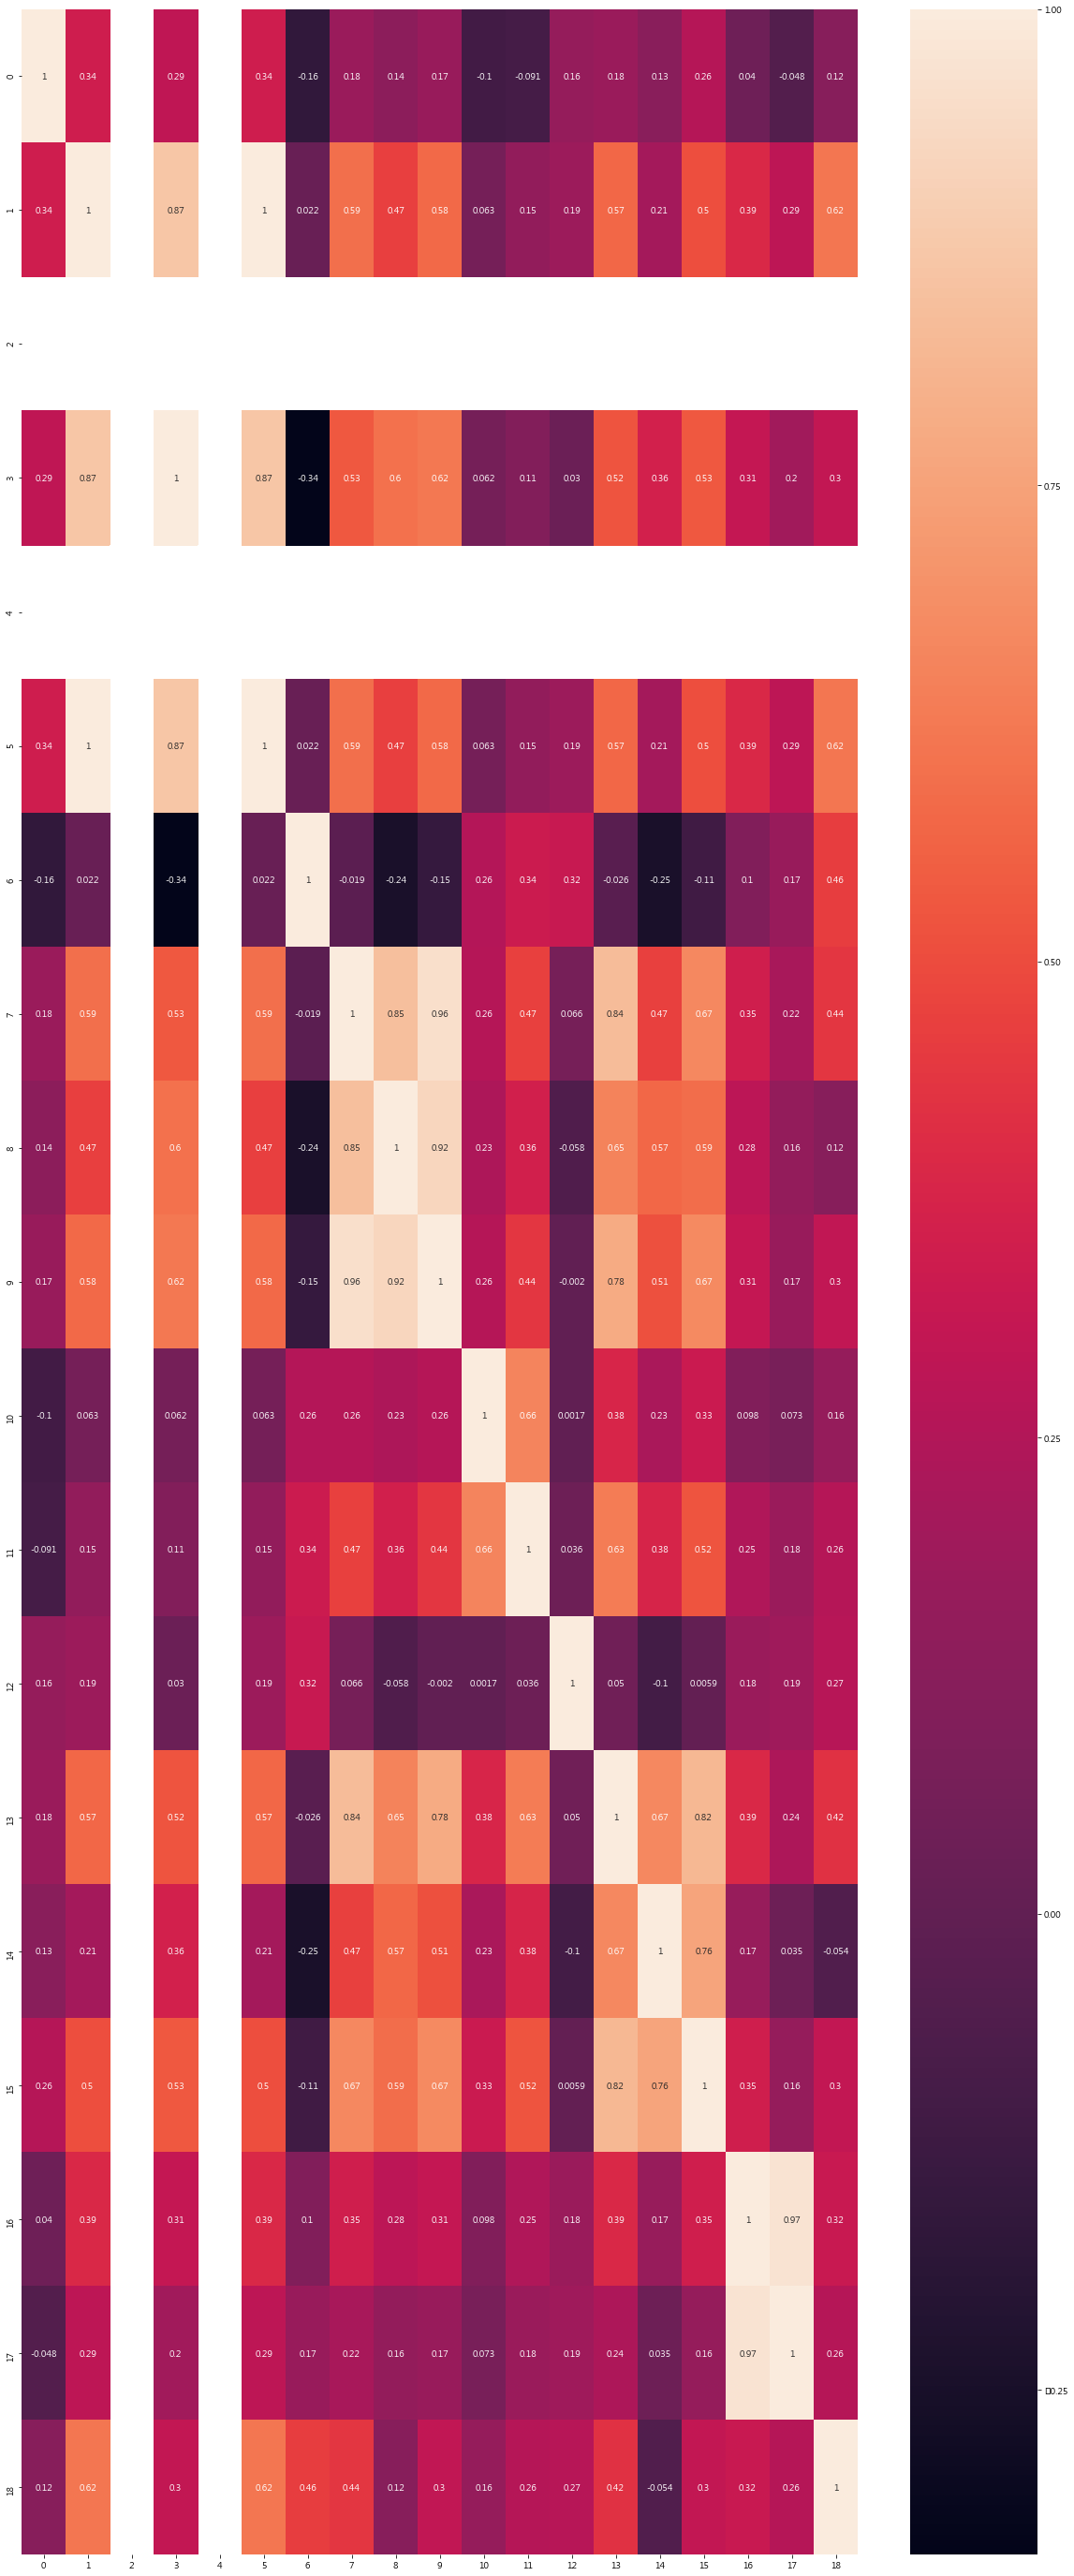

In [33]:
plt.figure(figsize=(20,50))

sns.heatmap(data = scale_IT.corr(), annot = True)
# plt.savefig('tmp.png')

In [34]:
# deep_IT = deep_IT.drop(['발행할 주식의 총수(주)', '현재까지 발행한 주식의 총수(주)', '현재까지 감소한 주식의 총수(주)',
#                         '정규+무기계약_기말인원(남)(명)', '정규+무기계약_기말인원(여)(명)', '기간제_기말인원(남)(명)',
#                         '합계_기말인원_남(명)', '합계_기말인원_여(명)'], axis = 1)
# deep_IT = deep_IT.drop('합계_기말인원(명)', axis = 1)

In [35]:
scale_IT = scale_IT.drop([2,4],axis = 1)

In [36]:
scale_IT.head() 

,0,1,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,-2.409364,-2.409364,-2.409364,0.0,-2.973715,-2.895999,-3.009050,-0.479880,-0.723644,0.318700,-0.387075,5.191122,2.988117,-1.421397,-1.728999,-1.790783
1,0.0,-0.882590,-0.882590,-0.882590,0.0,-2.973715,-2.895999,-3.009050,-0.479880,-0.723644,-0.952787,-2.044934,-0.644832,-1.875284,-0.969513,-0.651327,-1.303754
2,0.0,-0.854769,-0.854769,-0.854769,0.0,-2.973715,-2.895999,-3.009050,-0.479880,-0.723644,-1.048355,-1.556944,-0.729429,-1.577829,-0.484283,-0.072458,-1.025452
3,0.0,-0.850014,-0.850014,-0.850014,0.0,-0.157866,0.640327,0.004788,-0.287871,-0.362396,-1.652749,-1.262843,0.004575,-0.904639,0.562761,0.948692,-1.582056
4,0.0,-0.839848,-0.839848,-0.839848,0.0,-0.077557,0.599115,0.061307,-0.328387,-0.360173,-1.342358,-1.113614,0.009551,-0.794267,-1.339695,-1.327758,-1.651632


In [37]:
#deep_IT.columns

In [38]:
scale_IT

,0,1,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,-2.409364,-2.409364,-2.409364,0.000000,-2.973715,-2.895999,-3.009050,-0.479880,-0.723644,0.318700,-0.387075,5.191122,2.988117,-1.421397,-1.728999,-1.790783
1,0.000000,-0.882590,-0.882590,-0.882590,0.000000,-2.973715,-2.895999,-3.009050,-0.479880,-0.723644,-0.952787,-2.044934,-0.644832,-1.875284,-0.969513,-0.651327,-1.303754
2,0.000000,-0.854769,-0.854769,-0.854769,0.000000,-2.973715,-2.895999,-3.009050,-0.479880,-0.723644,-1.048355,-1.556944,-0.729429,-1.577829,-0.484283,-0.072458,-1.025452
3,0.000000,-0.850014,-0.850014,-0.850014,0.000000,-0.157866,0.640327,0.004788,-0.287871,-0.362396,-1.652749,-1.262843,0.004575,-0.904639,0.562761,0.948692,-1.582056
4,0.000000,-0.839848,-0.839848,-0.839848,0.000000,-0.077557,0.599115,0.061307,-0.328387,-0.360173,-1.342358,-1.113614,0.009551,-0.794267,-1.339695,-1.327758,-1.651632
5,0.000000,-0.833349,-0.833349,-0.833349,0.000000,-0.011302,0.622665,0.119860,-0.347764,-0.380180,-0.033037,-0.981813,0.015772,-0.695637,-0.668065,-0.612302,-1.122858
6,0.000000,-0.833319,-0.833319,-0.833319,0.000000,-0.002769,0.603040,0.122706,-0.479880,-0.410191,0.712309,-0.992705,0.003331,-0.711293,-0.042234,0.168195,-0.997622
7,0.000000,-0.833319,-0.833319,-0.833319,0.000000,-0.053464,0.544167,0.069440,-0.419988,-0.472437,0.403249,-1.117971,-0.086242,-0.857672,0.622211,0.948692,-1.053283
8,0.000000,-0.828675,-0.828675,-0.828675,0.000000,-0.017325,0.457819,0.080825,-0.416465,-0.494668,-0.877582,-1.037365,-0.168351,-0.851410,-1.320433,-1.327758,-0.093141
9,0.000000,-0.828667,-0.828667,-0.828667,0.000000,0.014799,0.343998,0.083264,-0.180417,-0.339053,0.253360,-0.821691,-0.233043,-0.737125,-0.643904,-0.547261,-0.468849


# 샤비어함수 및 히든레이어 5개

# 및 Validation

In [39]:
# Review : Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # reproducibility
tf.reset_default_graph()


x_data = scale_IT.iloc[:,:-1]
y_data = deep_IT.iloc[:,[-1]]


# parameters
placeholder_num = len(x_data.columns)
learning_rate = 0.001




X = tf.placeholder(tf.float32, [None, placeholder_num])
Y = tf.placeholder(tf.float32, [None, 1])
keep_prob = tf.placeholder(tf.float32)


W1 = tf.get_variable("W1", shape=[placeholder_num, 32], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([32]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)


W2 = tf.get_variable("W2", shape=[32, 64], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([64]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[64, 64], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([64]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)


W4 = tf.get_variable("W4", shape=[64, 32], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([32]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)


W5 = tf.get_variable("W5", shape=[32, 1], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([1]))
L5 = tf.nn.relu(tf.matmul(L4, W5) + b5)

# hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(L4,W5) + b5)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# train = tf.train.AdamOptimizer(1e-4).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [40]:
# Launch graph

validation_number = 20
#init_state = lstm_cell.zero_state(128, tf.float32)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(5001)):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data.iloc[:-validation_number,:], Y: y_data.iloc[:-validation_number,:], keep_prob: 0.8})       
        if step % 200 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))    

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data.iloc[-validation_number:,:], Y: y_data.iloc[-validation_number:,:], keep_prob: 1.0})

Step : 0 	 Cost : 0.9844883680343628
Step : 1 	 Cost : 1.0666359663009644
Step : 2 	 Cost : 0.927631676197052
Step : 3 	 Cost : 0.9884530305862427
Step : 4 	 Cost : 1.0690197944641113
Step : 5 	 Cost : 0.8709010481834412
Step : 6 	 Cost : 0.8375300168991089
Step : 7 	 Cost : 0.9438861012458801
Step : 8 	 Cost : 0.9802019596099854
Step : 9 	 Cost : 0.9049698114395142
Step : 200 	 Cost : 0.7189658284187317
Step : 400 	 Cost : 0.7268191576004028
Step : 600 	 Cost : 0.7469716668128967
Step : 800 	 Cost : 0.6989519596099854
Step : 1000 	 Cost : 0.7058087587356567
Step : 1200 	 Cost : 0.6629757285118103
Step : 1400 	 Cost : 0.6488576531410217
Step : 1600 	 Cost : 0.7489734292030334
Step : 1800 	 Cost : 0.6386076807975769
Step : 2000 	 Cost : 0.6890308260917664
Step : 2200 	 Cost : 0.6585487723350525
Step : 2400 	 Cost : 0.6244985461235046
Step : 2600 	 Cost : 0.741001307964325
Step : 2800 	 Cost : 0.6986031532287598
Step : 3000 	 Cost : 0.6228803396224976
Step : 3200 	 Cost : 0.6523587703704

In [41]:
print('모델 정확도: ', a * 100 , '%')

모델 정확도:  85.00000238418579 %


In [42]:
# pd.DataFrame(y_data.iloc[-validation_number:,:].values, c.ravel()).reset_index()
pd.DataFrame({'real':list(y_data.iloc[-validation_number:,:].values.ravel()),'predict': list(c.ravel())})

,real,predict
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,0.0,0.0
6,1.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [43]:
h # hypothesis

array([[0.5929998 ],
       [0.53445345],
       [0.8122441 ],
       [0.50256276],
       [0.5625232 ],
       [0.3240277 ],
       [0.3294332 ],
       [0.2821829 ],
       [0.20891401],
       [0.21409835],
       [0.25512868],
       [0.44700044],
       [0.5831311 ],
       [0.71020585],
       [0.57678115],
       [0.726063  ],
       [0.6447748 ],
       [0.5050697 ],
       [0.26637834],
       [0.40899837]], dtype=float32)

# 제약

In [44]:
greencross_corr = greencross.corr(method = 'pearson')
df_greencross = pd.DataFrame(greencross_corr['1년뒤종가']).reset_index().sort_values('1년뒤종가', ascending = False)
df_greencross.columns = ['지표','1년뒤종가']

daewoong_corr = daewoong.corr(method = 'pearson')
df_daewoong = pd.DataFrame(daewoong_corr['1년뒤종가']).reset_index().sort_values('1년뒤종가', ascending = False)
df_daewoong.columns = ['지표','1년뒤종가']

yoohan_corr = ssem.corr(method = 'pearson')
df_yoohan = pd.DataFrame(yoohan_corr['1년뒤종가']).reset_index().sort_values('1년뒤종가', ascending = False)
df_yoohan.columns = ['지표','1년뒤종가']

hanmi_corr = hanmi.corr(method = 'pearson')
df_hanmi = pd.DataFrame(hanmi_corr['1년뒤종가']).reset_index().sort_values('1년뒤종가', ascending = False)
df_hanmi.columns = ['지표','1년뒤종가']

In [45]:
pd.concat([df_greencross.reset_index(drop = True), df_daewoong.reset_index(drop = True),
           df_yoohan.reset_index(drop = True), df_hanmi.reset_index(drop = True)],axis = 1)

,지표,1년뒤종가,지표,1년뒤종가,지표,1년뒤종가,지표,1년뒤종가
0,1년뒤종가,1.000000,1년뒤종가,1.000000,1년뒤종가,1.000000,1년뒤종가,1.000000
1,합계_기말인원_남(명),0.722926,최저가,0.754793,연간수익률,0.603141,유통주식수 (발행주식의 총수 - 자기주식수)(주),0.823585
2,합계_기말인원(명),0.713290,종가,0.736131,수익률상승하락,0.494859,현재까지 발행한 주식의 총수(주),0.822728
3,자기주식수(주),0.709881,합계_기말인원_여(명),0.726053,거래량,0.415787,발행주식의 총수 (현재 발행한 주식수 - 현재 감소한 주식수)(주),0.822728
4,합계_기말인원_여(명),0.685813,최고가,0.713401,거래대금,0.389699,거래대금,0.797480
5,기간제_기말인원(명),0.668005,합계_기말인원(명),0.609114,최고가,0.370461,거래량,0.760903
6,연간수익률,0.631678,정규+무기계약_기말인원(여)(명),0.605204,종가,0.357774,자기주식수(주),0.639247
7,현재까지 발행한 주식의 총수(주),0.513872,유통주식수 (발행주식의 총수 - 자기주식수)(주),0.583239,합계_평균근속연수,0.356442,최고가,0.637290
8,발행주식의 총수 (현재 발행한 주식수 - 현재 감소한 주식수)(주),0.513872,현재까지 발행한 주식의 총수(주),0.566393,최저가,0.339417,종가,0.606313
9,유통주식수 (발행주식의 총수 - 자기주식수)(주),0.478324,발행주식의 총수 (현재 발행한 주식수 - 현재 감소한 주식수)(주),0.566393,합계_1인평균년간급여(천원),0.201125,합계_기말인원(명),0.596029


In [46]:
list_corr = []
order = 15 # 기업별로 상위 30개 상관관계 변수 추출

for i in range(len(df_greencross.index[:order])):
    list_corr.append(df_greencross.index[:order][i])
    list_corr.append(df_daewoong.index[:order][i])
    list_corr.append(df_yoohan.index[:order][i])
    list_corr.append(df_hanmi.index[:order][i])

variable = pd.Series(list_corr).value_counts()
variable = pd.DataFrame(variable).reset_index()
variable.columns = ['var_index', 'number']

In [47]:
var = []
for i in range(len(variable)):
    var.append(df_greencross[df_greencross.index == variable['var_index'][i]]['지표'].values[0])
var = pd.DataFrame(var)
var.columns = ['var']

In [48]:
deep_greencross = greencross[corr['var'][3:22]]
deep_yoohan = yoohan[corr['var'][3:22]]
deep_daewoong = daewoong[corr['var'][3:22]]
deep_hanmi = hanmi[corr['var'][3:22]]

deep_greencross['수익률상승하락'] = greencross['수익률상승하락']
deep_yoohan['수익률상승하락'] = yoohan['수익률상승하락']
deep_daewoong['수익률상승하락'] = daewoong['수익률상승하락']
deep_hanmi['수익률상승하락'] = hanmi['수익률상승하락']

In [49]:
deep_greencross = clean_dataset(deep_greencross)
deep_yoohan = clean_dataset(deep_yoohan)
deep_daewoongs = clean_dataset(deep_daewoong)
deep_hanmi = clean_dataset(deep_hanmi)

In [50]:
# 표준화

from sklearn.preprocessing import StandardScaler

scaler_greencross = StandardScaler()
scale_greencross = pd.DataFrame(scaler_greencross.fit_transform(deep_greencross.iloc[:,:-1]))

scaler_yoohan = StandardScaler()
scale_yoohan = pd.DataFrame(scaler_yoohan.fit_transform(deep_yoohan.iloc[:,:-1]))

scaler_daewoong = StandardScaler()
scale_daewoong = pd.DataFrame(scaler_daewoong.fit_transform(deep_daewoong.iloc[:,:-1]))

scaler_hanmi = StandardScaler()
scale_hanmi = pd.DataFrame(scaler_hanmi.fit_transform(deep_hanmi.iloc[:,:-1]))

# 원래 값으로 변환
# scaler_lg.inverse_transform(scale_lg)

In [51]:
# 주가를 합치려고 만듬(마지막 열을 가져오면 됨)
deep_Medicine = pd.concat([deep_greencross,deep_yoohan,deep_daewoong,deep_hanmi], ignore_index=True)

# 표준화한 변수를 합치려고 만듬
scale_Medicine = pd.concat([scale_greencross,scale_yoohan,scale_daewoong,scale_hanmi], ignore_index=True)

scale_Medicine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,-2.157639,0.0,-2.211096,0.0,-2.157639,-0.990535,-2.430560,-2.226083,-2.396318,-0.787856,-1.035711,-0.230525,-1.178353,-1.236767,-1.197684,-0.684009,-0.438413,-0.772171
1,0.000000,-2.157639,0.0,-2.211096,0.0,-2.157639,-0.990535,-2.430560,-2.226083,-2.396318,-0.787856,-1.035711,-0.276174,-1.261252,-1.194137,-1.243743,0.006041,0.505037,0.534952
2,0.000000,-1.306044,0.0,-1.298580,0.0,-1.306044,-0.990535,-2.430560,-2.226083,-2.396318,-0.787856,-1.035711,0.686630,-0.988869,-1.137296,-1.034382,0.884208,1.546893,0.099245
3,0.000000,-1.297087,0.0,-1.288982,0.0,-1.297087,-0.990535,-2.430560,-2.226083,-2.396318,-0.787856,-1.035711,0.535449,-1.237566,-1.194137,-1.226995,-1.365359,-1.343824,0.099245
4,0.000000,-1.162733,0.0,-1.145016,0.0,-1.162733,-0.990535,-0.074250,-0.390522,-0.140920,-0.787856,-1.035711,-1.141441,-1.154667,-1.137296,-1.151625,-0.666676,-0.420068,0.317098
5,0.000000,-1.113470,0.0,-1.092228,0.0,-1.113470,-0.990535,-0.129147,-0.414464,-0.189514,-0.787856,-1.035711,-0.843751,-1.308623,-1.179926,-1.273054,0.005150,0.519606,1.043278
6,0.000000,-0.947766,0.0,-0.914670,0.0,-0.947766,-0.990535,-0.097476,-0.390522,-0.159352,-0.787856,-1.035711,-0.697818,-1.219802,-1.137296,-1.197684,0.728888,1.468452,1.769457
7,0.000000,-0.947766,0.0,-0.914670,0.0,-0.947766,-0.990535,-0.086919,-0.406484,-0.154325,-0.787856,-1.035711,0.877795,-1.190195,-1.165716,-1.185122,-1.340697,-1.296880,1.406367
8,0.000000,-0.947766,0.0,-0.914670,0.0,-0.947766,-0.990535,-0.025689,-0.342638,-0.092327,-0.787856,-1.035711,-0.656204,-1.018476,-1.052034,-1.030195,-0.721085,-0.554962,1.769457
9,0.000000,-0.947766,0.0,-0.914670,0.0,-0.947766,-0.990535,0.092549,-0.135140,0.045074,-0.787856,-1.035711,-0.487043,-0.686879,-0.682567,-0.686843,0.612578,1.063770,1.769457


In [52]:
scale_Medicine.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.198674,NaN,0.197550,NaN,0.198674,0.153337,0.105607,0.175473,0.126983,0.087603,0.065951,0.147297,0.158486,0.213018,0.070906,-0.053940,-0.072549,0.261277
1,0.198674,1.000000,NaN,0.844815,NaN,1.000000,0.775722,0.672475,0.785262,0.708492,0.394477,0.589104,0.190961,0.563629,0.721695,0.703582,0.148052,0.018914,0.199768
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.197550,0.844815,NaN,1.000000,NaN,0.844815,0.472357,0.502664,0.587728,0.531736,0.290832,0.436600,0.093016,0.448603,0.538921,0.561406,0.102249,-0.010138,-0.062364
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.198674,1.000000,NaN,0.844815,NaN,1.000000,0.775722,0.672475,0.785262,0.708492,0.394477,0.589104,0.190961,0.563629,0.721695,0.703582,0.148052,0.018914,0.199768
6,0.153337,0.775722,NaN,0.472357,NaN,0.775722,1.000000,0.633585,0.757079,0.671213,0.391981,0.550440,0.217881,0.584872,0.695540,0.706812,0.230114,0.098092,0.267775
7,0.105607,0.672475,NaN,0.502664,NaN,0.672475,0.633585,1.000000,0.946392,0.996374,0.298518,0.461222,0.166717,0.656665,0.639074,0.494428,0.142751,0.051177,0.169321
8,0.175473,0.785262,NaN,0.587728,NaN,0.785262,0.757079,0.946392,1.000000,0.970267,0.402758,0.603181,0.144886,0.695242,0.812299,0.664262,0.208995,0.087916,0.235982
9,0.126983,0.708492,NaN,0.531736,NaN,0.708492,0.671213,0.996374,0.970267,1.000000,0.328204,0.501450,0.162839,0.671847,0.689655,0.542145,0.160637,0.061099,0.188092


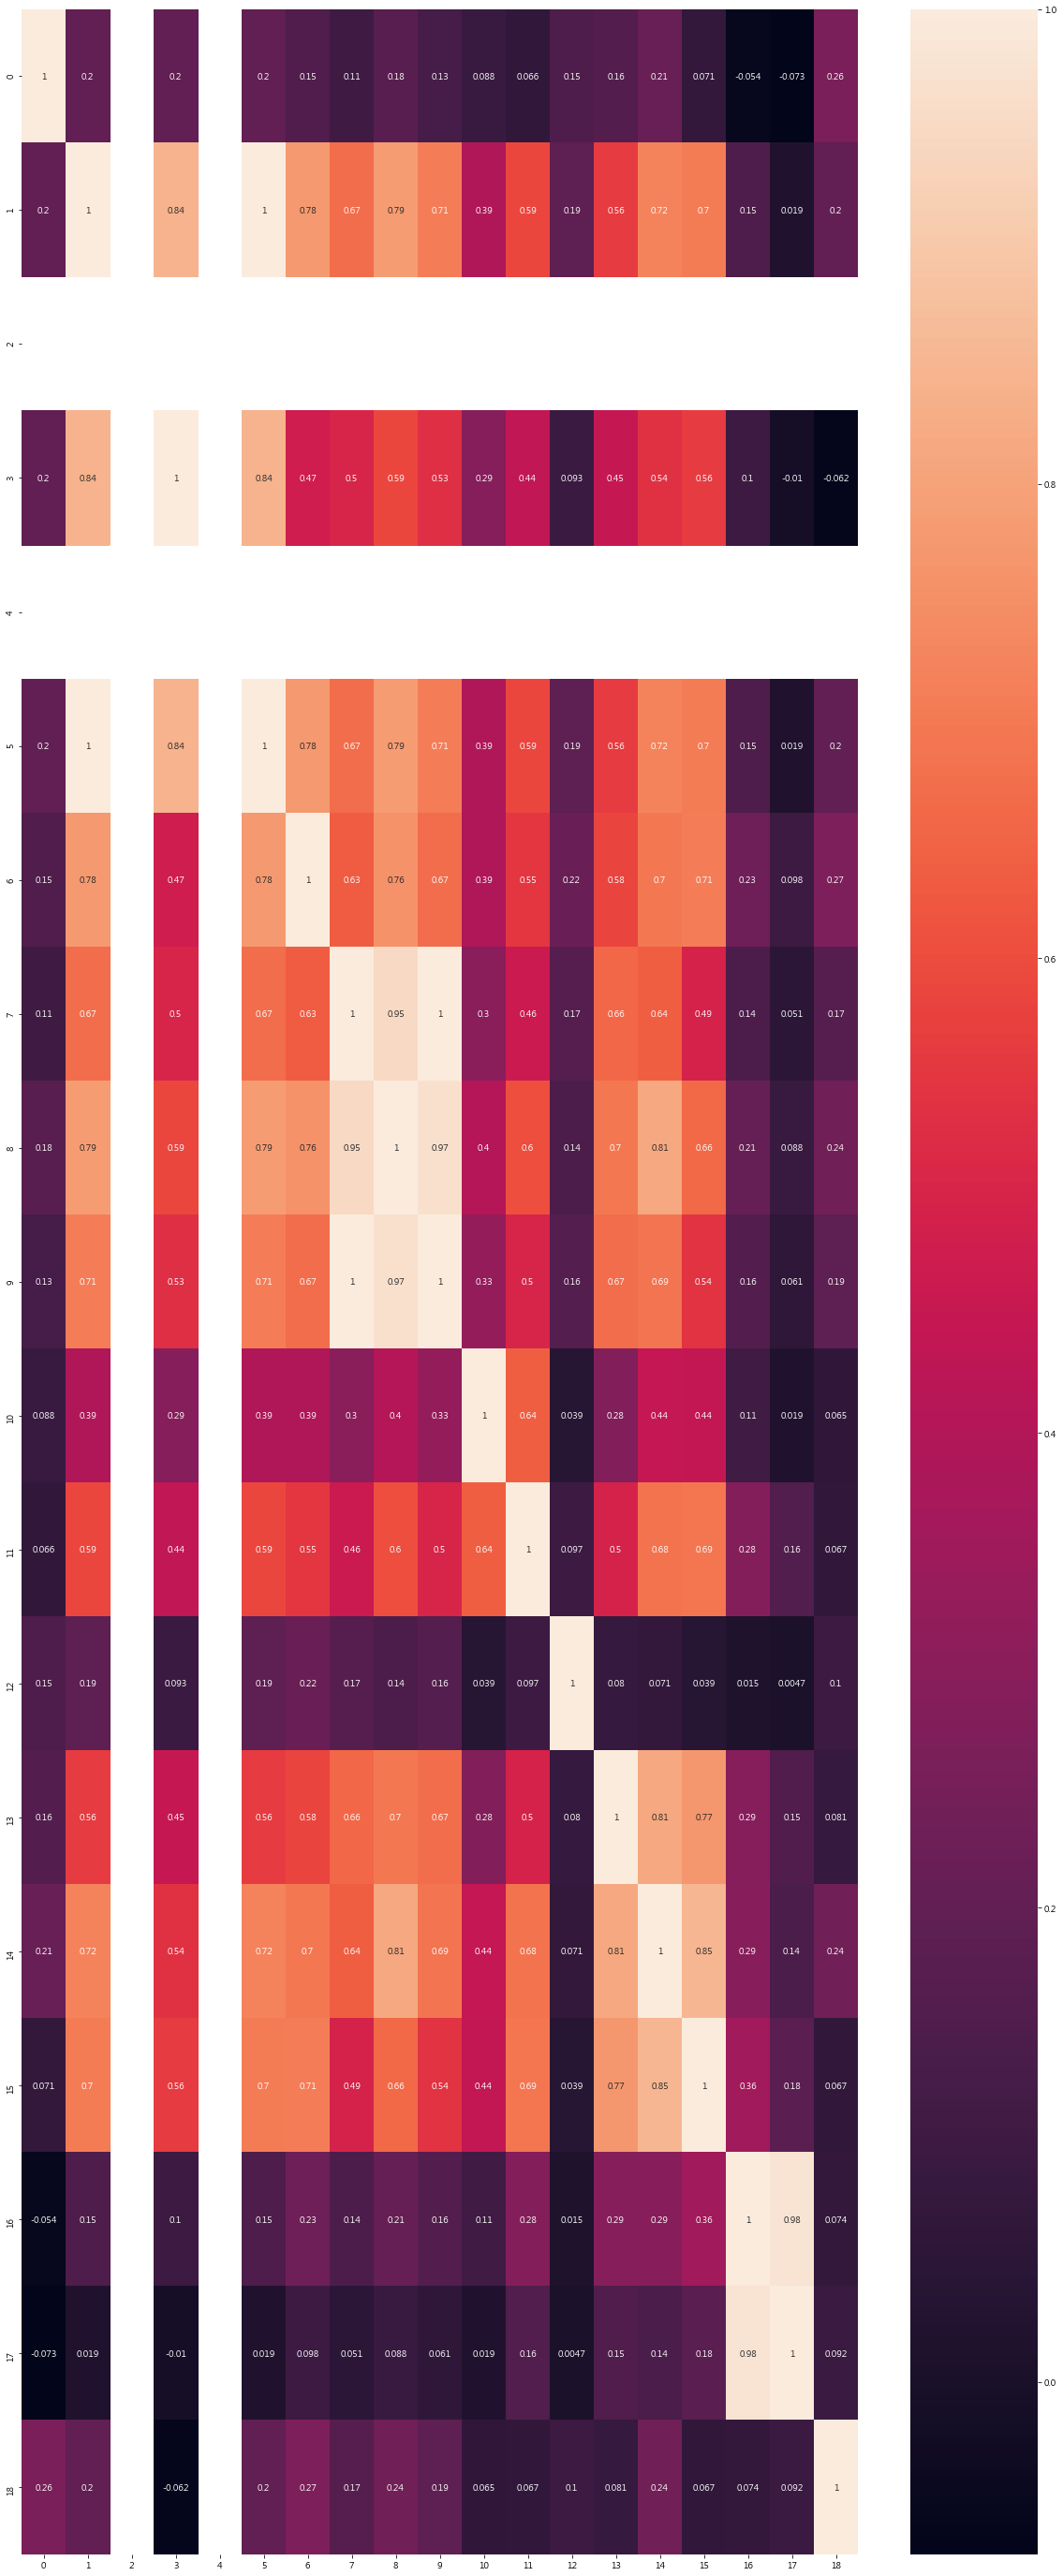

In [53]:
plt.figure(figsize=(20,50))

sns.heatmap(data = scale_Medicine.corr(), annot = True)
# plt.savefig('tmp.png')

In [54]:
scale_Medicine = scale_Medicine.drop([2,4],axis = 1)

In [55]:
# Review : Learning rate and Evaluation
import tensorflow as tf
import random
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # reproducibility
tf.reset_default_graph()


x_data = scale_Medicine.iloc[:,:-1]
y_data = deep_Medicine.iloc[:,[-1]]


# parameters
placeholder_num = len(x_data.columns)
learning_rate = 0.001




X = tf.placeholder(tf.float32, [None, placeholder_num])
Y = tf.placeholder(tf.float32, [None, 1])
keep_prob = tf.placeholder(tf.float32)


W1 = tf.get_variable("W1", shape=[placeholder_num, 32], initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([32]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)


W2 = tf.get_variable("W2", shape=[32, 64], initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([64]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)

W3 = tf.get_variable("W3", shape=[64, 64], initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([64]))
L3 = tf.nn.relu(tf.matmul(L2, W3) + b3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)


W4 = tf.get_variable("W4", shape=[64, 32], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([32]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob=keep_prob)


W5 = tf.get_variable("W5", shape=[32, 1], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([1]))
L5 = tf.nn.relu(tf.matmul(L4, W5) + b5)

# hypothesis = tf.matmul(L4, W5) + b5

# define cost/loss & optimizer

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(L4,W5) + b5)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# train = tf.train.AdamOptimizer(1e-4).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [56]:
# Launch graph

validation_number = 20
#init_state = lstm_cell.zero_state(128, tf.float32)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(5001)):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data.iloc[:-validation_number,:], Y: y_data.iloc[:-validation_number,:], keep_prob: 0.8})       
        if step % 200 == 0 or step < 10 :
            print("Step : {} \t Cost : {}".format(step, cost_val))    

    # Accuracy report
    h1, c1, a1 = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data.iloc[-validation_number:,:], Y: y_data.iloc[-validation_number:,:], keep_prob: 1.0})

Step : 0 	 Cost : 0.9203363656997681
Step : 1 	 Cost : 1.0284552574157715
Step : 2 	 Cost : 0.8758108019828796
Step : 3 	 Cost : 0.9651809930801392
Step : 4 	 Cost : 0.9208898544311523
Step : 5 	 Cost : 0.7784700393676758
Step : 6 	 Cost : 0.8081888556480408
Step : 7 	 Cost : 0.8637585639953613
Step : 8 	 Cost : 0.9182103276252747
Step : 9 	 Cost : 0.7941213846206665
Step : 200 	 Cost : 0.7046718001365662
Step : 400 	 Cost : 0.8101756572723389
Step : 600 	 Cost : 0.876988410949707
Step : 800 	 Cost : 0.6366534233093262
Step : 1000 	 Cost : 0.7424854636192322
Step : 1200 	 Cost : 0.6930118203163147
Step : 1400 	 Cost : 0.6612651348114014
Step : 1600 	 Cost : 0.696108341217041
Step : 1800 	 Cost : 0.6291489601135254
Step : 2000 	 Cost : 0.6535706520080566
Step : 2200 	 Cost : 0.6160672307014465
Step : 2400 	 Cost : 0.6133673787117004
Step : 2600 	 Cost : 0.6306641101837158
Step : 2800 	 Cost : 0.615117609500885
Step : 3000 	 Cost : 0.5716322064399719
Step : 3200 	 Cost : 0.61079674959182

In [57]:
print('모델 정확도: ', a1 * 100 , '%')

모델 정확도:  80.0000011920929 %


In [58]:
# pd.DataFrame(y_data.iloc[-validation_number:,:].values, c.ravel()).reset_index()
pd.DataFrame({'real':list(y_data.iloc[-validation_number:,:].values.ravel()),'predict': list(c1.ravel())})

,real,predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0
9,1.0,1.0


In [59]:
h1

array([[0.39523616],
       [0.39703625],
       [0.39229518],
       [0.43234497],
       [0.4166313 ],
       [0.6799386 ],
       [0.9166263 ],
       [0.9055745 ],
       [0.8932599 ],
       [0.68727535],
       [0.7760066 ],
       [0.6610909 ],
       [0.47612065],
       [0.5253566 ],
       [0.61757165],
       [0.75219566],
       [0.8008765 ],
       [0.78044266],
       [0.8392214 ],
       [0.8009837 ]], dtype=float32)